In [24]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [33]:
data=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_liverpool_liver_.csv")
data=data.dropna()
data=data.sort_values(by="Tritium")
print(data.shape)
data['symbol']=[x.split('(')[1].replace(')','') for x in data.AA_name]
data.head(20)

(20, 8)


,AA_name,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,symbol
18,Tryptophan (W),0.08,0.160827,0.055420,0.217313,0.204695,0.275247,0.317972,W
16,Threonine (T),0.20,0.261430,0.276031,0.406578,0.087385,0.110729,0.130429,T
4,Phenylalanine (F),0.32,0.500013,0.461578,0.392564,0.103649,0.127582,0.161198,F
19,Tyrosine (Y),0.42,0.759470,0.800394,0.698180,0.122066,0.154306,0.193258,Y
9,Leucine (L),0.54,0.782039,0.788905,0.856875,0.065216,0.081763,0.101928,L
17,Valine (V),0.56,0.698645,0.632306,0.669575,0.073244,0.092910,0.109394,V
8,lysine (K),0.60,0.608181,0.880657,0.460312,0.131310,0.155384,0.203099,K
7,Isoleucine (I),1.00,0.690155,0.598042,0.728394,0.087585,0.107384,0.133929,I
10,Methionine (M),1.12,0.996538,0.604734,0.856123,0.157171,0.256955,0.228031,M
1,Cysteine (C),1.62,1.739482,1.401057,2.047250,0.195007,0.324002,0.283168,C


In [34]:
data.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.927139,0.925794,0.931180,-0.158798,-0.128637,-0.194874
Asym_NEH,0.927139,1.000000,0.994007,0.994980,-0.152351,-0.096144,-0.163215
APE,0.925794,0.994007,1.000000,0.987620,-0.188961,-0.152978,-0.193595
MPE,0.931180,0.994980,0.987620,1.000000,-0.133040,-0.078241,-0.151041
Asym_NEH_ci,-0.158798,-0.152351,-0.188961,-0.133040,1.000000,0.965729,0.989936
APE_ci,-0.128637,-0.096144,-0.152978,-0.078241,0.965729,1.000000,0.945919
MPE_ci,-0.194874,-0.163215,-0.193595,-0.151041,0.989936,0.945919,1.000000


In [35]:
Asym_NEH=abs(data.Tritium - data.Asym_NEH)/data.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data.Tritium - data.APE)/data.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data.Tritium - data.MPE)/data.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.2886513818280208 0.2621867611571276
APE 0.36355817385363665 0.20757121480433338
MPE 0.25810645714239805 0.38780459675570367


In [36]:
data2=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_utmb-liver_.csv")
data2=data2.dropna()
data2=data2.sort_values(by="Tritium")
print(data2.shape)
data2['symbol']=[x.split('(')[1].replace(')','') for x in data2.AA_name]
# data2.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Workplace\\C++\\d2ome_restructure\\d2ome_restructure\\d2ome_GUI\\d2ome_GUI\\v2\\bin\\Debug\\Estimated_AA_neh_numbers_utmb-liver_.csv'

In [37]:
data2.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.884581,0.853884,0.881819,-0.125341,-0.090215,-0.183555
Asym_NEH,0.884581,1.000000,0.993955,0.997388,-0.223356,-0.180606,-0.274278
APE,0.853884,0.993955,1.000000,0.994812,-0.258643,-0.218786,-0.305399
MPE,0.881819,0.997388,0.994812,1.000000,-0.236219,-0.189788,-0.289903
Asym_NEH_ci,-0.125341,-0.223356,-0.258643,-0.236219,1.000000,0.992939,0.991740
APE_ci,-0.090215,-0.180606,-0.218786,-0.189788,0.992939,1.000000,0.973552
MPE_ci,-0.183555,-0.274278,-0.305399,-0.289903,0.991740,0.973552,1.000000


In [38]:
Asym_NEH=abs(data2.Tritium - data2.Asym_NEH)/data2.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data2.Tritium - data2.APE)/data2.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data2.Tritium - data2.MPE)/data2.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.36026007534757754 0.5465420272295302
APE 0.3762774802966907 0.6509904281246781
MPE 0.30706511976326073 0.34569153879165426


In [39]:
def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,7)) 
    plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        if i ==0: k=-1
        else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,40,2)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
    plt.xticks(range(0,40,2),input_data.AA_name,rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


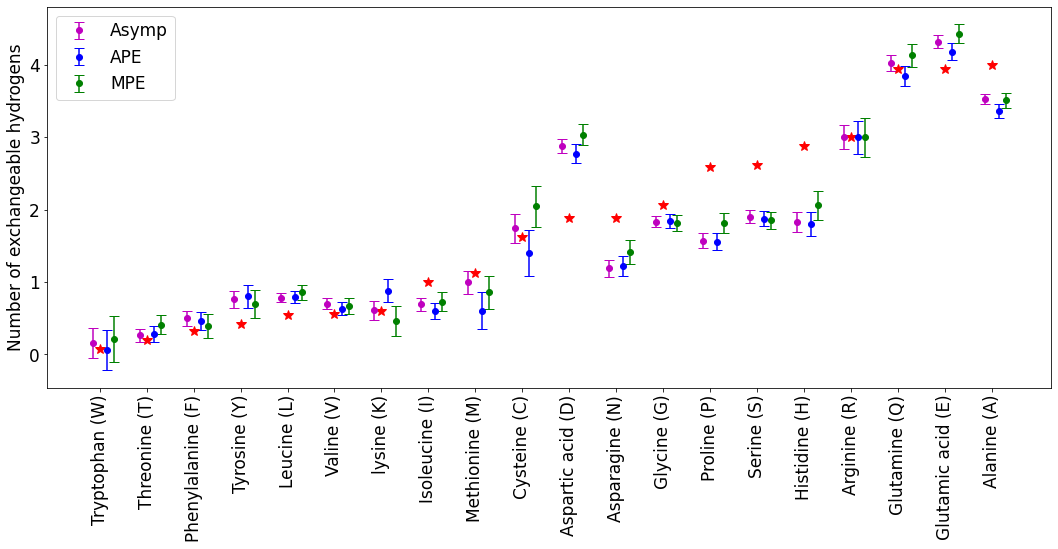

In [40]:
plot_neh_aa(data,'lv')
# plot_neh_aa(data2,'utmb')